## Research Questions – Part2 – Sales and Letting Data
1.	Import libraries & set directory paths
2.	Import Portal data, check dimensions and data types
    - Import: stone_signs_portal_v2.1_month_workcate.csv
3.	Change datetime string columns to datetime data types
4.  Addressing research questions continued:
    - Qu.6) How long does it take to action a sign request?
        -	Display as histogram, and categorise lead-times
        -	Display lead time categories as Pie Chart
        -	Export to: stone_signs_portal_v3.1_saleslets_lead.csv
	- Qu.7) How many sign requests are received on a daily basis?
	- Qu.8) How many sign requests are completed on a daily basis?
        -	Show as histograms
        -	Compare Descriptive Statistics


### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
from datetime import date
import datetime
import matplotlib.patches as mpatches

### set directory paths

In [2]:
dataset = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\02 Data'
dataset

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\02 Data'

In [3]:
vizpath = r'D:\My Documents\! Omnicompetent Ltd\Career Foundry - Data Analytics\Data Analytics Course\60 Advanced Analytics and Dashboard Design\Stone Signs Portal Analysis\04 Analysis'
vizpath

'D:\\My Documents\\! Omnicompetent Ltd\\Career Foundry - Data Analytics\\Data Analytics Course\\60 Advanced Analytics and Dashboard Design\\Stone Signs Portal Analysis\\04 Analysis'

## Import Portal Data

In [4]:
df_portal = pd.read_csv(os.path.join(dataset,'stone_signs_portal_v2.1_month_workcate - 28,900.csv'))
df_portal.head()

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,harvesine_distance_miles,latitude_group,longitude_group,zone,zone_area,is_up,month_no,month,year,work_category
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3508.926836,1.0,2.0,12,SE Sussex,1,10,Oct,2020,Letting
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,3508.978003,1.0,2.0,12,SE Sussex,1,11,Nov,2020,Sales
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,3508.978003,1.0,2.0,12,SE Sussex,0,9,Sep,2020,Sales
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3509.207113,1.0,2.0,12,SE Sussex,0,10,Oct,2020,Letting
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,3509.207113,1.0,2.0,12,SE Sussex,0,3,Mar,2021,Letting


### check dimensions & data types

In [5]:
df_portal.shape

(28900, 40)

In [6]:
df_portal.dtypes

request_id                    int64
request_datetime             object
completed_datetime           object
completed_duration_days     float64
completed_duration_hours    float64
agent_name                   object
agent_code                   object
branch_name                  object
branch_code                   int64
sign_category                object
sign_action                  object
board_type                   object
sign_type                    object
address_1                    object
address_2                    object
address_3                    object
town                         object
postcode                     object
latitude                    float64
longitude                   float64
quantity                      int64
additional_info              object
request_status               object
payment_status               object
net_charge                  float64
vat                         float64
gross_charge                float64
invoice_datetime            

### convert request_datetime & completed_datetime columns from string to datetime

In [7]:
df_portal['request_datetime'] = pd.to_datetime(df_portal['request_datetime'],format='%Y-%m-%d %H:%M')
df_portal['completed_datetime'] = pd.to_datetime(df_portal['completed_datetime'],format='%Y-%m-%d %H:%M')
df_portal.dtypes

request_id                           int64
request_datetime            datetime64[ns]
completed_datetime          datetime64[ns]
completed_duration_days            float64
completed_duration_hours           float64
agent_name                          object
agent_code                          object
branch_name                         object
branch_code                          int64
sign_category                       object
sign_action                         object
board_type                          object
sign_type                           object
address_1                           object
address_2                           object
address_3                           object
town                                object
postcode                            object
latitude                           float64
longitude                          float64
quantity                             int64
additional_info                     object
request_status                      object
payment_sta

## Research Questions

### Create Sales and Letting Subset for further analysis on performance

In [8]:
df_saleslet = df_portal.loc[(df_portal['sign_category']=='Sales') | (df_portal['sign_category']=='Letting')]
df_saleslet.shape

(27473, 40)

### export to CSV

In [9]:
df_saleslet.to_csv(os.path.join(dataset,'stone_signs_portal_v3.0_saleslets - 27,473.csv'), index=False)

## Qu.6) How long does it take to action a sign request?

In [10]:
df_saleslet[['completed_duration_days','completed_duration_hours']].describe()

,completed_duration_days,completed_duration_hours
count,27473.000000,27473.000000
mean,1.549507,37.187581
std,1.822699,43.745393
min,0.000000,0.000000
25%,0.810000,19.500000
50%,1.060000,25.400000
75%,1.960000,47.000000
max,49.820000,1195.800000


Some signs requests are added to the Portal post completion in order to keep the system up-to-date.  These items result in zero hours for completion, these will be exclude from the descriptive statistics to prevent skewing the time frame data.

### exclude records where completed duration is zero hours

In [11]:
df_saleslet1 = df_saleslet.loc[df_saleslet['completed_duration_hours']!=0]
df_saleslet1.shape

(26920, 40)

### re-review descriptive statistics

In [12]:
df_saleslet1[['completed_duration_days','completed_duration_hours']].describe()

,completed_duration_days,completed_duration_hours
count,26920.000000,26920.000000
mean,1.581337,37.951501
std,1.827606,43.863184
min,0.000000,0.100000
25%,0.830000,19.900000
50%,1.070000,25.700000
75%,1.970000,47.300000
max,49.820000,1195.800000


### calculate mode time taken to complete a sign request

In [13]:
df_saleslet1[['completed_duration_days','completed_duration_hours']].mode()

,completed_duration_days,completed_duration_hours
0,0.93,24.0


#### Observations: 
- The median and the mode suggest that sign requests are typically actioned in around 24 hrs.  
- The mean however show this to be closer to a 1.5 days.  
- The maximum time taken to action a sign is 7 weeks but Q3 is still less than 2 days.
### What percentage of signs are completed within 48 hours?

## Show completion duration as Histogram

<AxesSubplot:xlabel='completed_duration_days', ylabel='Count'>

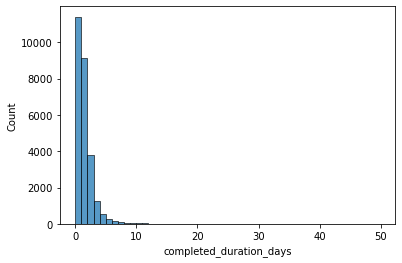

In [14]:
sns.histplot(df_saleslet1['completed_duration_days'], bins=50)

### divide histogram into following bins
1. 0 to 2 days
2. 2 to 7 days
3. up to 49 days

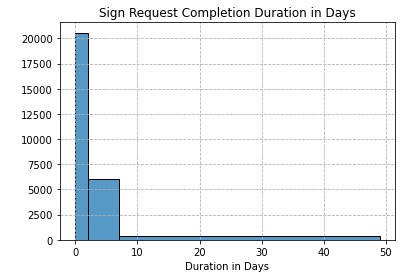

In [16]:
sns.histplot(df_saleslet1['completed_duration_days'], bins=[0,2,7,49])
plt.title('Sign Request Completion Duration in Days')
plt.xlabel('Duration in Days')
plt.ylabel(' ')
plt.grid(True, linestyle='--')

plt.savefig(os.path.join(vizpath,'Qu.6) Sign Request Completion Duration in Days.png'))

#### Observation: 
    The majority of requests are executed within 48 hours

## Display as pie chart

### categorise complete duration into the following categories
- Standard 48hr
- Within Week
- Extended

In [17]:
df_saleslet1.loc[df_saleslet1['completed_duration_days']<=2, 'lead_time']='Standard 48hr'
df_saleslet1.loc[(df_saleslet1['completed_duration_days']>2) & (df_saleslet1['completed_duration_days']<=7), 'lead_time']='Within Week'
df_saleslet1.loc[df_saleslet1['completed_duration_days']>7, 'lead_time']='Extended'
df_saleslet1.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,latitude_group,longitude_group,zone,zone_area,is_up,month_no,month,year,work_category,lead_time
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,1.0,2.0,12,SE Sussex,1,10,Oct,2020,Letting,Within Week
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,1.0,2.0,12,SE Sussex,1,11,Nov,2020,Sales,Standard 48hr
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,1.0,2.0,12,SE Sussex,0,9,Sep,2020,Sales,Standard 48hr
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,1.0,2.0,12,SE Sussex,0,10,Oct,2020,Letting,Within Week
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,1.0,2.0,12,SE Sussex,0,3,Mar,2021,Letting,Within Week


### check values

In [18]:
lead_times = df_saleslet1['lead_time'].value_counts()
lead_times

Standard 48hr    20679
Within Week       5886
Extended           355
Name: lead_time, dtype: int64

### define labels

In [19]:
lead_label = ['Standard 48hr','Within the Week','Extended']

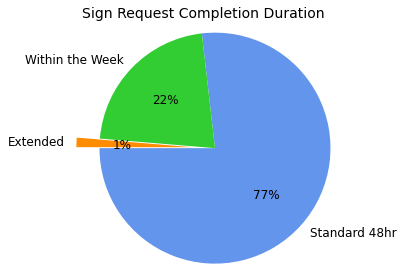

In [21]:
sizes = lead_times
colors = ['cornflowerblue','limegreen','darkorange']
explode = (0, 0, 0.2)
labels = lead_label

texts = plt.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.0f%%', textprops={'fontsize':12}, startangle=180)

plt.axis('equal')
plt.title('Sign Request Completion Duration', fontsize=14)
plt.tight_layout()

plt.savefig(os.path.join(vizpath,'Qu.6) Sign Request Completion Duration.png'))

### export update to CSV

In [22]:
df_saleslet1.shape

(26920, 41)

In [23]:
df_saleslet1.to_csv(os.path.join(dataset,'stone_signs_portal_v3.1_saleslets_leadtimes - 26,920.csv'), index=False)

## Qu.7) How many sign requests are received on a daily basis?
## Qu.8) How many sign requests are completed on a daily basis?

### extract date portion only of datetime columns

In [24]:
df_saleslet1['request_date'] = [d.date() for d in df_saleslet1['request_datetime']]
df_saleslet1['completed_date'] = [d.date() for d in df_saleslet1['completed_datetime']]
df_saleslet1.head()

<ipython-input-24-0e99db4e89cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleslet1['request_date'] = [d.date() for d in df_saleslet1['request_datetime']]
<ipython-input-24-0e99db4e89cc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleslet1['completed_date'] = [d.date() for d in df_saleslet1['completed_datetime']]


,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,zone,zone_area,is_up,month_no,month,year,work_category,lead_time,request_date,completed_date
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,12,SE Sussex,1,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,12,SE Sussex,1,11,Nov,2020,Sales,Standard 48hr,2020-11-26,2020-11-28
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,12,SE Sussex,0,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,12,SE Sussex,0,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,12,SE Sussex,0,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11


### group by request_date to calculate number of requests per day

In [25]:
df_saleslet1['requests_per_day'] = df_saleslet1.groupby(['request_date'])['quantity'].transform(np.size)
df_saleslet1.head()

<ipython-input-25-d6e52b02b3dd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleslet1['requests_per_day'] = df_saleslet1.groupby(['request_date'])['quantity'].transform(np.size)


,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,zone_area,is_up,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,SE Sussex,1,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,SE Sussex,1,11,Nov,2020,Sales,Standard 48hr,2020-11-26,2020-11-28,68
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,SE Sussex,0,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,SE Sussex,0,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,SE Sussex,0,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73


### group by completed_date to calculate number of requests completed per day

In [26]:
df_saleslet1['completed_per_day'] = df_saleslet1.groupby(['completed_date'])['quantity'].transform(np.size)
df_saleslet1.head()

<ipython-input-26-542702851d40>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_saleslet1['completed_per_day'] = df_saleslet1.groupby(['completed_date'])['quantity'].transform(np.size)


,request_id,request_datetime,completed_datetime,completed_duration_days,completed_duration_hours,agent_name,agent_code,branch_name,branch_code,sign_category,...,is_up,month_no,month,year,work_category,lead_time,request_date,completed_date,requests_per_day,completed_per_day
0,9215,2020-10-13 13:36:00,2020-10-18 08:52:00,4.80,115.3,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,1,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26
1,8199,2020-11-26 20:33:00,2020-11-28 11:48:00,1.64,39.3,Lextons,LEX,Lextons @Hove,600,Sales,...,1,11,Nov,2020,Sales,Standard 48hr,2020-11-26,2020-11-28,68,90
2,8199,2020-09-18 18:44:00,2020-09-19 14:15:00,0.81,19.5,Lextons,LEX,Lextons @Hove,600,Sales,...,0,9,Sep,2020,Sales,Standard 48hr,2020-09-18,2020-09-19,78,66
3,9209,2020-10-13 13:29:00,2020-10-18 08:52:00,4.81,115.4,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,0,10,Oct,2020,Letting,Within Week,2020-10-13,2020-10-18,83,26
4,9209,2021-03-09 11:05:00,2021-03-11 14:05:00,2.13,51.0,Oakley Property,OAK,OakleyProperty @BrightonLets,701,Letting,...,0,3,Mar,2021,Letting,Within Week,2021-03-09,2021-03-11,73,122


### display as histogram: number of sign requests made each day

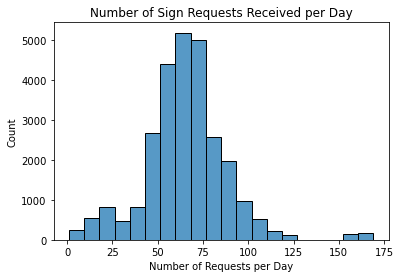

In [27]:
hist_request_per_day = sns.histplot(df_saleslet1['requests_per_day'], bins=20)
plt.title('Number of Sign Requests Received per Day')
plt.xlabel('Number of Requests per Day')

hist_request_per_day.figure.savefig(os.path.join(vizpath,'Qu.7) Number of Sign Requests Received per Day.png'))

### display as histogram: number of sign request completed each day

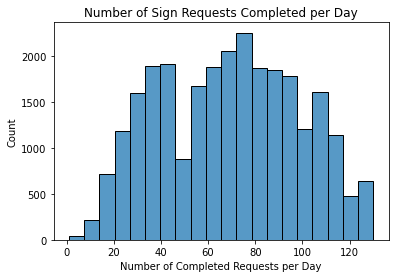

In [28]:
hist_completed_per_day = sns.histplot(df_saleslet1['completed_per_day'], bins=20)
plt.title('Number of Sign Requests Completed per Day')
plt.xlabel('Number of Completed Requests per Day')

hist_completed_per_day.figure.savefig(os.path.join(vizpath,'Qu.8) Number of Sign Requests Completed per Day.png'))

### review descriptive statistics

In [29]:
df_saleslet1[['requests_per_day','completed_per_day']].describe()

,requests_per_day,completed_per_day
count,26920.000000,26920.000000
mean,65.736701,68.990565
std,23.071336,29.475244
min,1.000000,1.000000
25%,53.000000,43.000000
50%,66.000000,70.000000
75%,76.000000,92.000000
max,169.000000,130.000000


### export to CSV for review

In [30]:
df_saleslet1.shape

(26920, 45)

In [31]:
df_saleslet1.to_csv(os.path.join(dataset,'stone_signs_portal_v3.2_saleslets_lead_perday - 26.920.csv'), index=False)